# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from consav import elapsed

from FullHANKSAMModel import FullHANKSAMModelClass
from figures import create_fig, save_fig, vary_par, IRF_figs

# Setup

In [2]:
model = FullHANKSAMModelClass(name='baseline')
model.load_parameters('calibration')
model.load_data()

In [3]:
model_HtM_debt = model.copy()
model_HtM_debt.load_parameters('calibration_HtM_debt')
model_HtM_debt.load_data()

In [4]:
models = [model,model_HtM_debt]

# Solve

In [5]:
for model_ in models:
    model_.find_ss()
    model_.compute_jacs(skip_shocks=True)
    model_.find_transition_path()

# Varying parameters

In [6]:
values_dict = {}
values_dict['sigma'] = [1.5,2.0,2.5]
values_dict['omega'] = [0.1,0.5,0.95]
values_dict['delta_q'] = [1-1/60,1-1/12,1-1/2]
values_dict['div_hh'] = [0.0,0.5,1.0]

latex_dict = {}
latex_dict['sigma'] = '\\sigma'
latex_dict['omega'] = '\\omega'
latex_dict['delta_q'] = '\\delta_q'
latex_dict['div_hh'] = 'fac.'

sigma
baseline
baseline: sigma = 2.0000
sigma =  1.5000: var_u =  1.31, C_drop_ss = -19.4, , C_drop_ini_ss =  -7.5
sigma =  2.0000: var_u =  1.37, C_drop_ss = -19.2, , C_drop_ini_ss =  -7.5
sigma =  2.5000: var_u =  1.44, C_drop_ss = -19.3, , C_drop_ini_ss =  -7.6
completed in 2.0 mins 15 secs

HtM_debt
baseline: sigma = 2.0000
sigma =  1.5000: var_u =  0.96, C_drop_ss = -21.3, , C_drop_ini_ss = -10.6
sigma =  2.0000: var_u =  0.90, C_drop_ss = -21.2, , C_drop_ini_ss = -10.6
sigma =  2.5000: var_u =  0.86, C_drop_ss = -21.2, , C_drop_ini_ss = -10.6
completed in 2.0 mins 22 secs


omega
baseline
baseline: omega = 0.9000
omega =  0.1000: var_u =  1.11, C_drop_ss = -19.2, , C_drop_ini_ss =  -7.5
omega =  0.5000: var_u =  1.33, C_drop_ss = -19.2, , C_drop_ini_ss =  -7.5
omega =  0.9500: var_u =  1.38, C_drop_ss = -19.2, , C_drop_ini_ss =  -7.5
completed in 2.0 mins 13 secs

HtM_debt
baseline: omega = 0.1000
omega =  0.1000: var_u =  0.90, C_drop_ss = -21.2, , C_drop_ini_ss = -10.6
omega = 

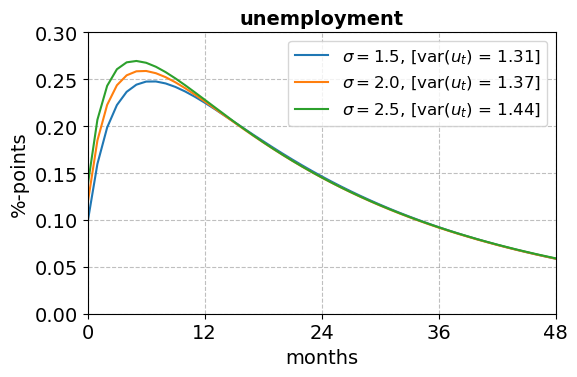

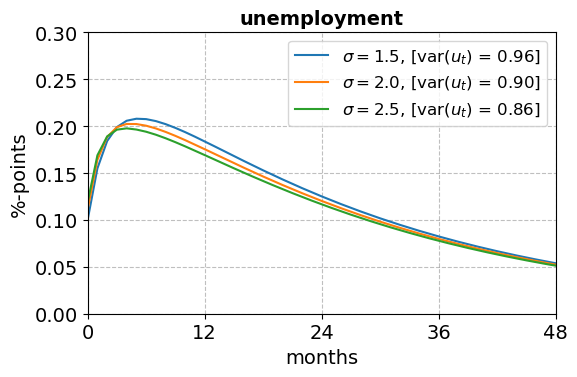

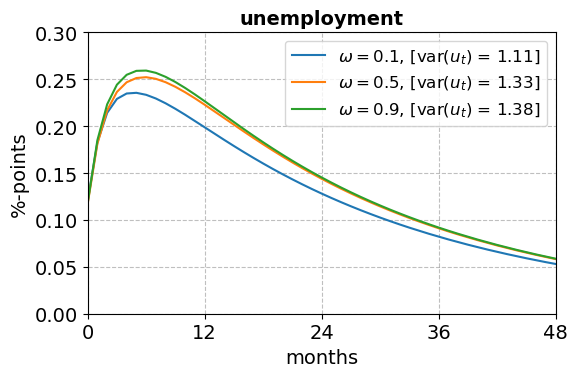

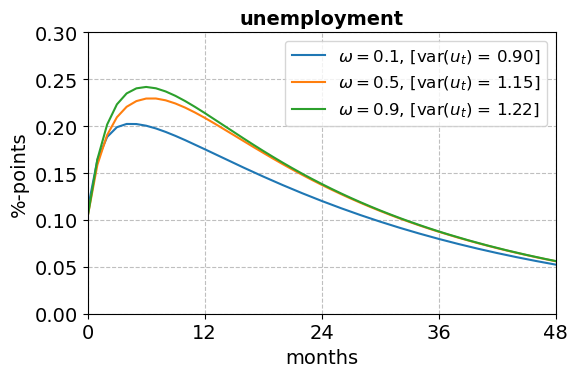

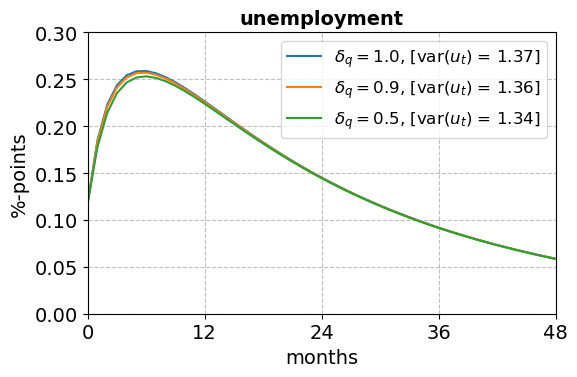

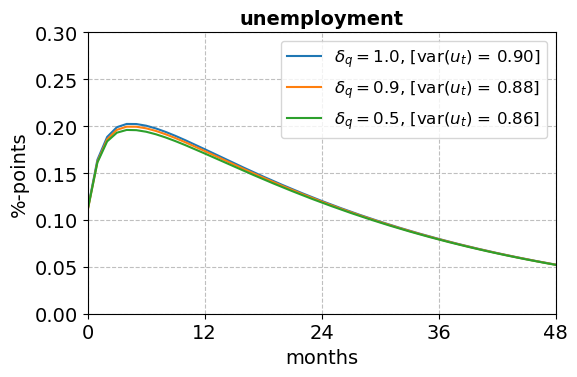

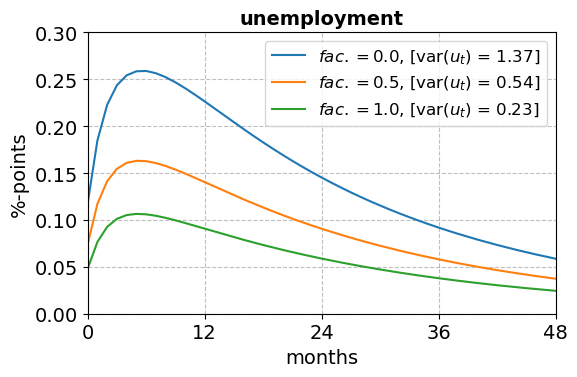

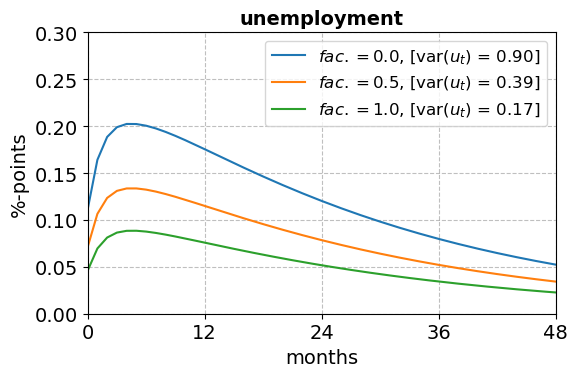

In [7]:
for parname in values_dict.keys():

    print(f'{parname}')
    
    for model_,name in [(model,'baseline'),(model_HtM_debt,'HtM_debt')]:
        
        print(f'{name}')
        
        values = values_dict[parname]
        models_ = vary_par(model_,parname,values,do_print=True,show_info=True)
        labels = [f'${latex_dict[parname]} = {model_.par.__dict__[parname]:.1f}$, [var($u_t$) = {model_.moms["var_u"]:.2f}]' for model_ in models_]
        
        IRF_figs(models_,labels,None,colors,
                 title='unemployment',
                 prefix=f'robustness_{name}',
                 parname=parname,
                 varname='u',
                 legend=True,
                 ylim=[0.0,0.3,])
        
        print('')
        
    print('')
        